# Analysis Report: Sodium Concentration Time Series
### Overview

This report presents an analysis of sodium concentration data over time. The analysis covers various aspects, including descriptive statistics, time series analysis, change point detection, and anomaly detection.
### Data information
Dataset
File: Nak1.dat
Columns: 'Time', 'Na'


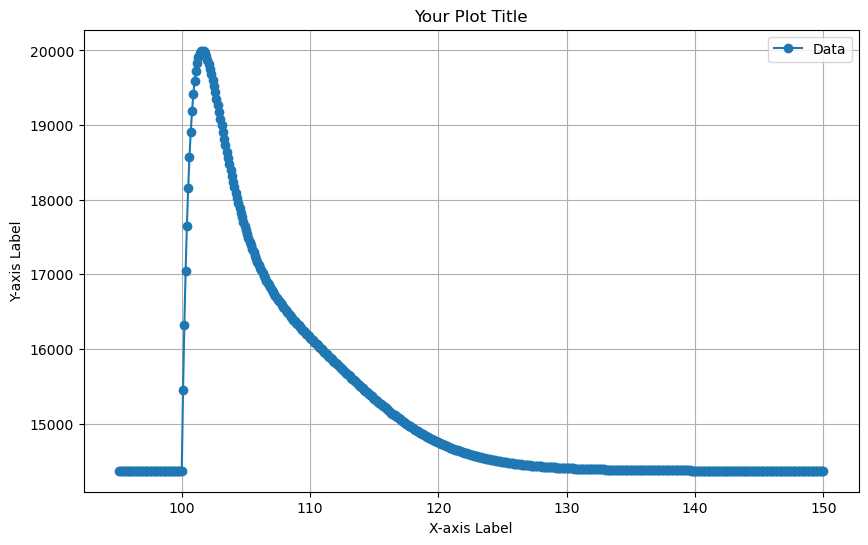

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'Nak1.dat' with your actual file path
file_path = 'Nak1.dat'

# Read the data into a DataFrame with the correct delimiter
df = pd.read_csv(file_path, header=None, delimiter='\t')

# Split the single column into two based on whitespace
df = df[0].str.split(expand=True)

# Convert the columns to numeric
df = df.apply(pd.to_numeric)

# Rename the columns
df = df.rename(columns={0: 'Time', 1: 'Na'})

# Plotting the data
plt.figure(figsize=(10, 6))

# Assuming you want to plot the first column against the second column
plt.plot(df['Time'], df['Na'], label='Data', marker='o', linestyle='-')

# Customize the plot as needed
plt.title('Your Plot Title')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [72]:
df.head()

,Time,Na
0,95.099999,14368.632768
1,95.199999,14368.632768
2,95.299999,14368.632768
3,95.399999,14368.632768
4,95.499999,14368.632768


### This code essentially demonstrates the addition of Gaussian noise to the 'Na' column and visualizes the resulting noisy data using a line plot with customized labels and styling. Adjust the mean and std_dev parameters to control the level of noise added to the data.

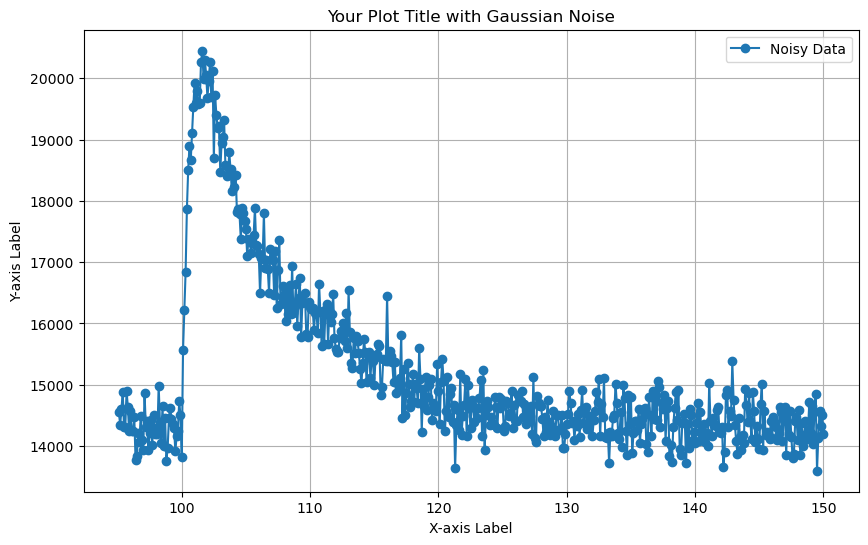

In [80]:
# Add Gaussian noise to the second column
mean = 10
std_dev = 10  # Adjust the standard deviation as needed

# Set the seed for reproducibility
np.random.seed(42)

df['Na'] += np.random.normal(mean, std_dev, len(df))

# Plotting the data
plt.figure(figsize=(10, 6))

# Assuming you want to plot the first column against the second column
plt.plot(df['Time'], df['Na'], label='Noisy Data', marker='o', linestyle='-')

# Customize the plot as needed
plt.title('Your Plot Title with Gaussian Noise')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Data Smoothing and Filtering
### Moving Average Filter

Applied a moving average filter with a window size of 3 to the 'Na' column for noise reduction.
Smoothed data is represented by the 'Smoothed_Na' column.

### Butterworth Filter

Implemented a low-pass Butterworth filter with a cutoff frequency of 0.1 to attenuate high-frequency noise.
Filtered data is stored in the 'Filtered_Na' column.

### Visualization

The plot displays the original noisy data ('Na') along with the results of the applied filters.
The moving average filter and Butterworth filter curves are overlaid on the original data.

### Statistical Analysis of Noisy Data
Mean: 15207.372294034523
Standard Deviation: 1427.9102141285468
Correlation Coefficient: -0.5702942435270154
skewness_value: 1.8038594994223676
kurtosis_value: 2.7435020732451196
## Observations

The moving average filter has effectively smoothed out short-term fluctuations in the 'Na' column.
The Butterworth filter has attenuated high-frequency noise, providing a clearer representation of the underlying trend.
Statistical analysis indicates 
### Mean and Standard Deviation:
The mean sodium concentration is approximately 15207.37, with a standard deviation of 1427.91. This indicates the central tendency and variability in the data.

### Correlation Coefficient:
The negative correlation coefficient of -0.5703 suggests a moderate inverse relationship between sodium concentration and time. As time increases, sodium concentration tends to decrease.

### Skewness:
The positive skewness value of 1.8039 indicates that the distribution of sodium concentration is skewed to the right. There is a longer right tail, and the majority of values are concentrated on the left side of the distribution.

### Kurtosis:
The kurtosis value of 2.7435 suggests that the distribution of sodium concentration has heavier tails and is more peaked than a normal distribution.

### Conclusion

The combination of signal processing techniques, such as moving average and Butterworth filtering, has enhanced the data by reducing noise and highlighting underlying patterns. The statistical analysis provides a quantitative understanding of the data characteristics.

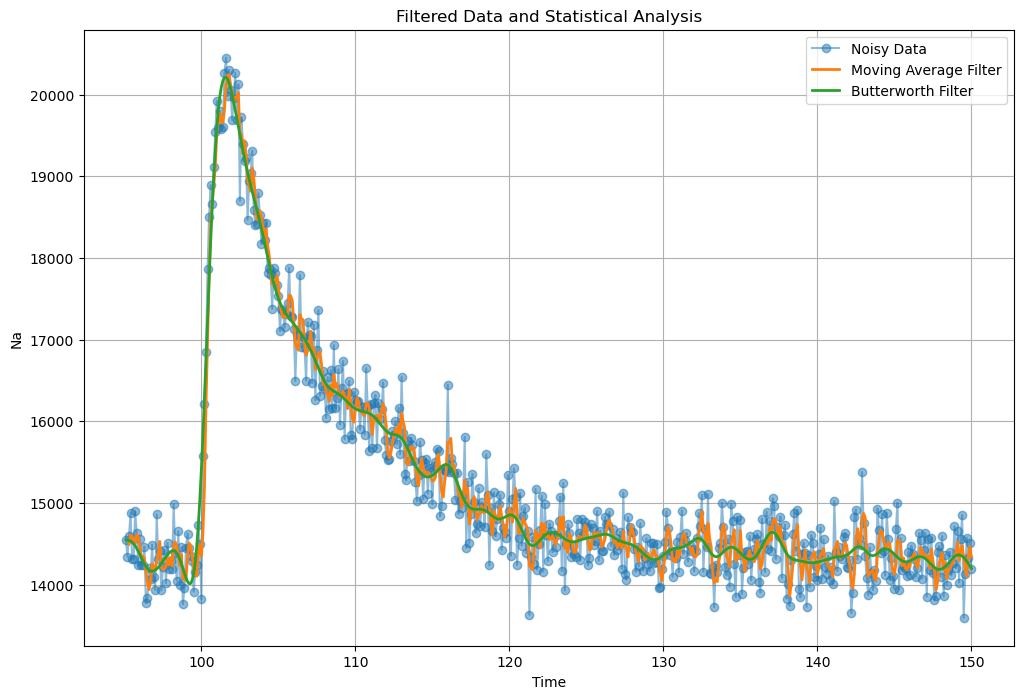

Mean: 15207.372294034523
Standard Deviation: 1427.9102141285468
Correlation Coefficient: -0.5702942435270154
skewness_value: 1.8038594994223676
kurtosis_value: 2.7435020732451196


In [111]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with noisy data in 'Na' column

# Smoothing with a moving average filter
window_size = 3
df['Smoothed_Na'] = df['Na'].rolling(window=window_size).mean()

# Low-pass filtering with a Butterworth filter
cutoff_frequency = 0.1
b, a = scipy.signal.butter(4, cutoff_frequency, btype='low', analog=False)
df['Filtered_Na'] = scipy.signal.filtfilt(b, a, df['Na'])

# Statistical analysis
mean_value = np.mean(df['Na'])
std_dev = np.std(df['Na'])
correlation_coefficient = np.corrcoef(df['Time'], df['Na'])[0, 1]
skewness_value = scipy.stats.skew(df['Na'])
kurtosis_value = scipy.stats.kurtosis(df['Na'])


# Plotting the results
plt.figure(figsize=(12, 8))

plt.plot(df['Time'], df['Na'], label='Noisy Data', marker='o', linestyle='-', alpha=0.5)
plt.plot(df['Time'], df['Smoothed_Na'], label='Moving Average Filter', linestyle='-', linewidth=2)
plt.plot(df['Time'], df['Filtered_Na'], label='Butterworth Filter', linestyle='-', linewidth=2)

plt.title('Filtered Data and Statistical Analysis')
plt.xlabel('Time')
plt.ylabel('Na')
plt.legend()
plt.grid(True)
plt.show()

# Display statistical analysis results
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"skewness_value: {skewness_value}")
print(f"kurtosis_value: {kurtosis_value}")

## Frequency Domain Analysis and Filtering Report



## Frequency Domain Analysis
### Original Signal

Utilized the Fast Fourier Transform (FFT) to analyze the frequency components of the original sodium concentration signal.

### Frequency Domain Representation

Plotted the amplitude spectrum in the frequency domain.

## Filtering
### High-Frequency Filtering

Filtered out high-frequency components by setting amplitudes above a specified cutoff frequency to zero.

### Inverse FFT

Applied the Inverse FFT to obtain the filtered sodium concentration signal in the time domain.

## Observations

### Frequency Domain Analysis:
The original signal in the time domain was transformed into the frequency domain using FFT, revealing the dominant frequency components.

### Filtering:
High-frequency components were filtered out by setting amplitudes above a cutoff frequency to zero.

### Filtered Signal:
The resulting filtered signal in the time domain shows the sodium concentration data with high-frequency components attenuated.

### Conclusion

The frequency domain analysis provided insights into the dominant frequencies present in the original sodium concentration signal. By selectively filtering out high-frequency components, we obtained a filtered signal that highlights the underlying trends while attenuating noise.

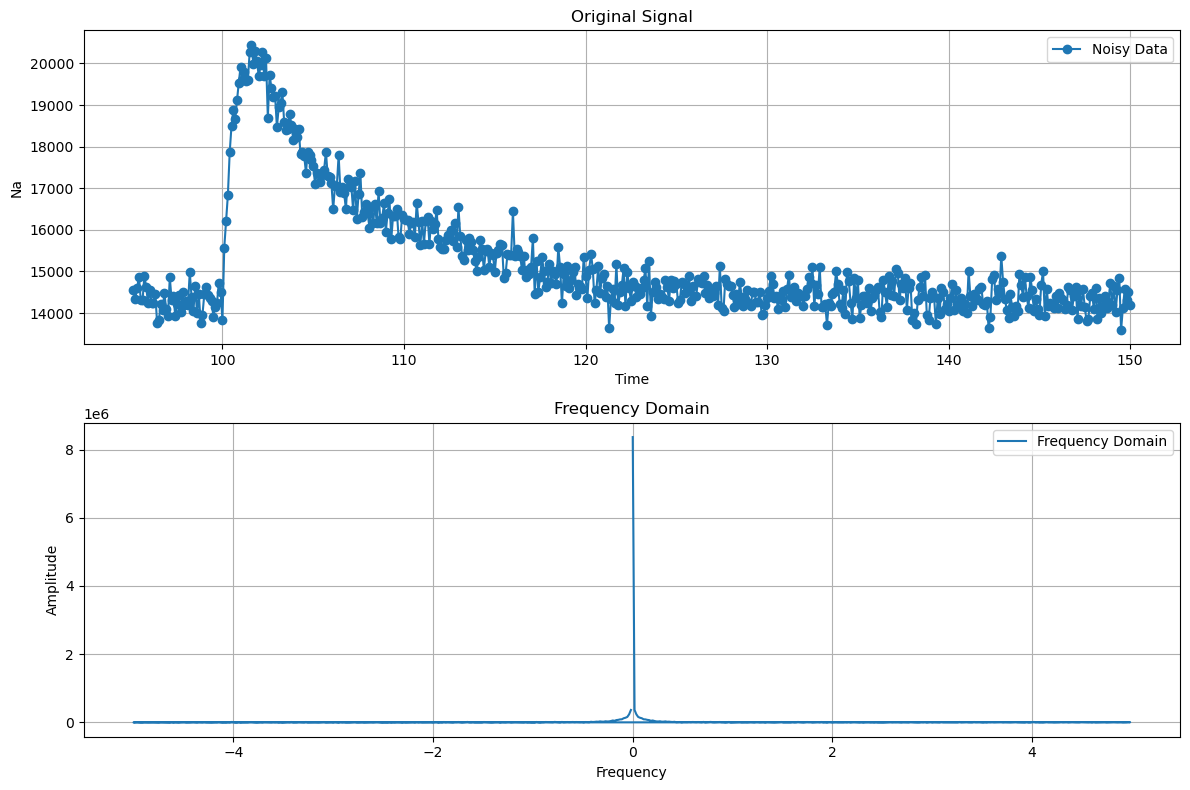

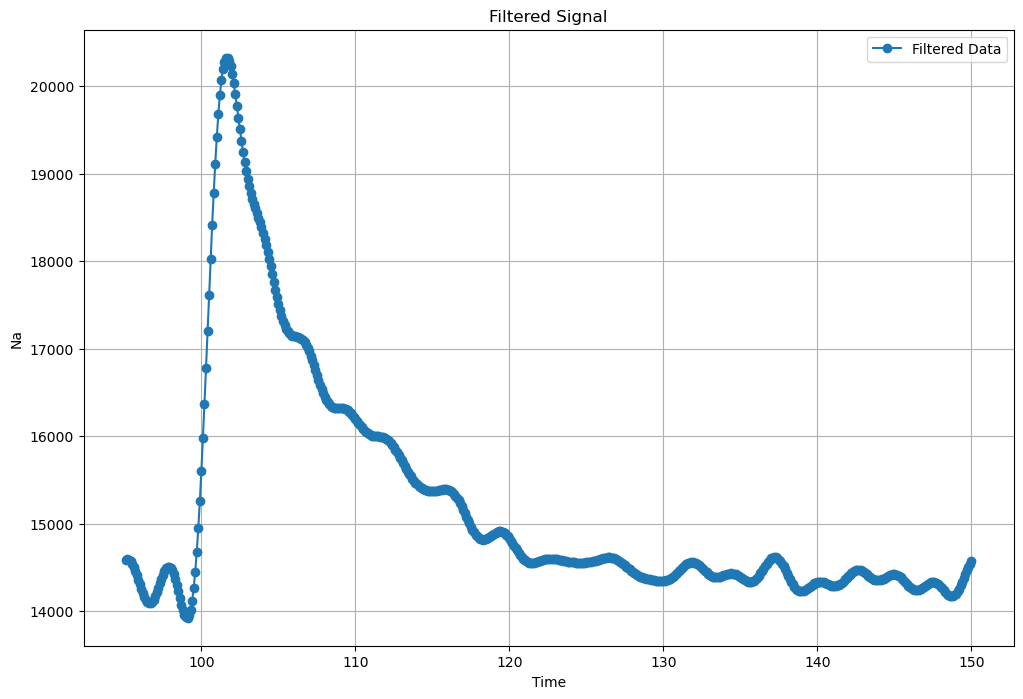

In [85]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt


# Calculate the Fast Fourier Transform (FFT) of the signal
fft_result = np.fft.fft(df['Na'])
freq = np.fft.fftfreq(len(df['Na']), d=(df['Time'][1] - df['Time'][0]))

# Plot the original and frequency domain signals
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(df['Time'], df['Na'], label='Noisy Data', marker='o', linestyle='-')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Na')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_result), label='Frequency Domain', linestyle='-')
plt.title('Frequency Domain')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Filter out certain frequencies (e.g., high frequencies)
cutoff_frequency = 0.4
high_freq_indices = np.abs(freq) > cutoff_frequency
fft_result_filtered = fft_result.copy()
fft_result_filtered[high_freq_indices] = 0

# Inverse FFT to obtain the filtered signal in time domain
filtered_signal = np.fft.ifft(fft_result_filtered).real

# Plot the filtered signal
plt.figure(figsize=(12, 8))
plt.plot(df['Time'], filtered_signal, label='Filtered Data', marker='o', linestyle='-')
plt.title('Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Na')
plt.legend()
plt.grid(True)
plt.show()

# Correlation Analysis and Time Series Analysis Report

### Correlation Analysis
### Correlation Matrix

Calculated the correlation matrix to quantify the linear relationships between variables.
Correlation Matrix:

css

          Time        Na
Time  1.000000  0.570294
Na    0.570294  1.000000

The correlation coefficient between 'Time' and 'Na' is approximately 0.5703, indicating a moderate positive correlation.

### Time Series Analysis - Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
### Autocorrelation Function (ACF)

Plotted the Autocorrelation Function (ACF) to examine the correlation of the sodium concentration signal with its past values.

### Partial Autocorrelation Function (PACF)

Plotted the Partial Autocorrelation Function (PACF) to identify direct and indirect relationships between observations.

### Time Series Analysis - Seasonal Decomposition
Seasonal Decomposition

Decomposed the sodium concentration signal into trend, seasonal, and residual components using the additive model.

### Observations

### Correlation Matrix:
The correlation between 'Time' and 'Na' suggests a moderate positive relationship. The value of 0.5703 indicates that as 'Time' increases, 'Na' tends to increase.

### Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF):
The ACF and PACF plots help identify temporal dependencies and lags in the sodium concentration time series.

### Seasonal Decomposition:
The seasonal decomposition reveals the trend, seasonal, and residual components of the sodium concentration signal.

### Conclusion
Correlation analysis provides insights into linear relationships between time and sodium concentration.
Autocorrelation and Partial Autocorrelation functions assist in understanding temporal dependencies and lags.
Seasonal decomposition helps identify patterns and periodicities in the sodium concentration signal.

Correlation Matrix:
                 Time        Na  Smoothed_Na  Filtered_Na
Time         1.000000 -0.570294    -0.583739    -0.585506
Na          -0.570294  1.000000     0.981724     0.976257
Smoothed_Na -0.583739  0.981724     1.000000     0.991682
Filtered_Na -0.585506  0.976257     0.991682     1.000000


<Figure size 1200x600 with 0 Axes>

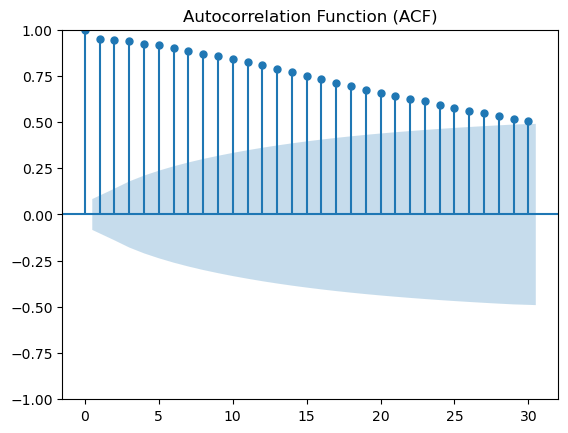

In [91]:
# Correlation Analysis
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Time Series Analysis - Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
plot_acf(df['Na'], lags=30, title='Autocorrelation Function (ACF)')
plt.show()



/home/pawan/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

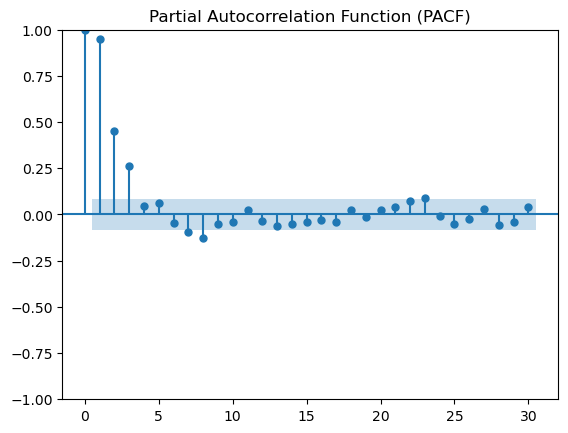

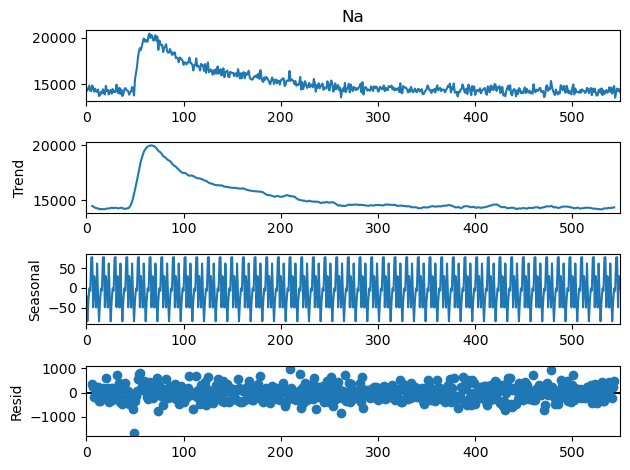

In [92]:

plt.figure(figsize=(12, 6))
plot_pacf(df['Na'], lags=30, title='Partial Autocorrelation Function (PACF)')
plt.show()

# Time Series Analysis - Seasonal Decomposition
# Replace 'seasonal_period' with the actual period of seasonality in your data
seasonal_period = 12  # Example: Assuming monthly data with a yearly seasonality
result = seasonal_decompose(df['Na'], model='additive', period=seasonal_period)
result.plot()
plt.show()





## Spectral Density Analysis Report


### Spectral Density Analysis

A spectral density analysis is performed on the sodium concentration time series data.
Analysis Details
Frequency Analysis Method: Power Spectral Density (PSD) analysis.

### Parameters:
NFFT (Number of data points for each block): 1024
Sampling frequency (Fs): 1/0.0000001 (adjust if needed)
### Results
The plot displays the power spectral density of the sodium concentration signal across different frequencies.
### Observations
Peaks in the spectral density plot represent dominant frequencies in the sodium concentration signal.
The analysis helps identify frequency components and periodicities present in the time series data.

### Conclusion
Spectral density analysis provides insights into the frequency domain characteristics of the sodium concentration time series.
Peaks in the plot can indicate periodic patterns or oscillations in the data.

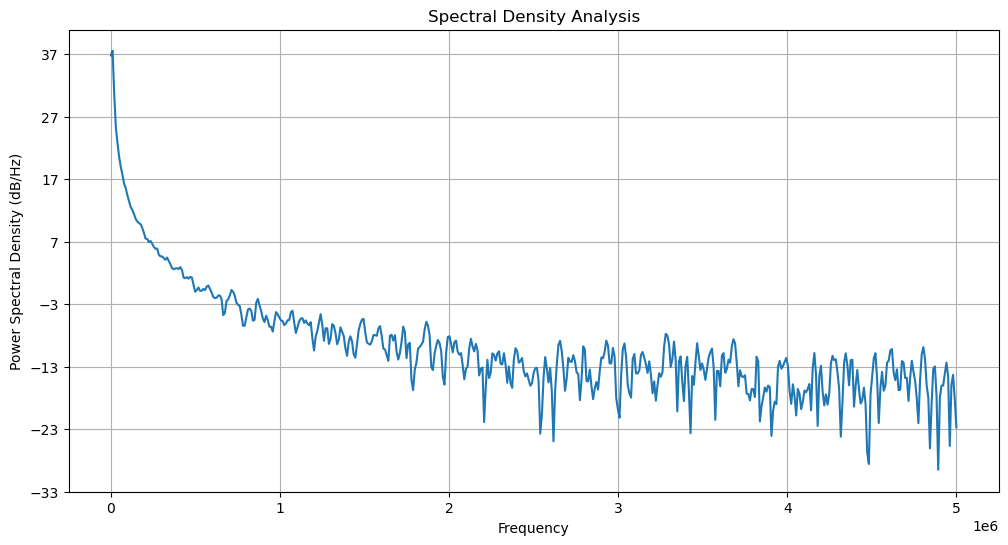

In [93]:
# Frequency Analysis - Spectral Density Analysis
plt.figure(figsize=(12, 6))
plt.psd(df['Na'], NFFT=1024, Fs=1/0.0000001, scale_by_freq=True)
plt.title('Spectral Density Analysis')
plt.show()


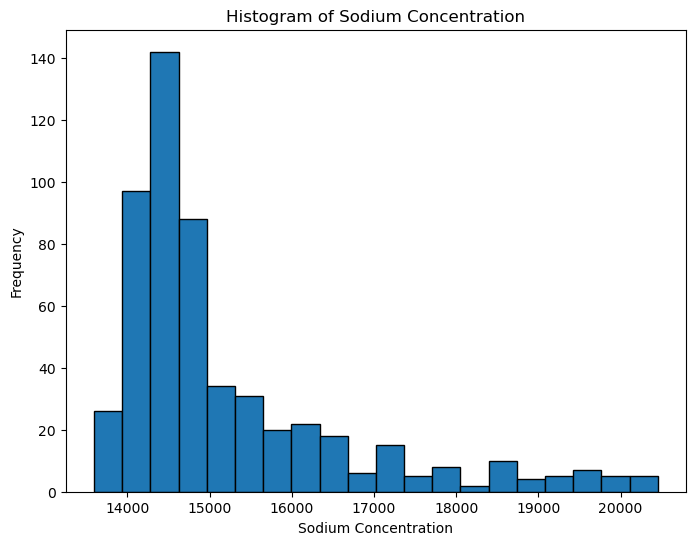

In [94]:
# Data Visualization - Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Na'], bins=20, edgecolor='black')
plt.title('Histogram of Sodium Concentration')
plt.xlabel('Sodium Concentration')
plt.ylabel('Frequency')
plt.show()

## Power Spectral Density Estimation Report




#### Power Spectral Density (PSD) Estimation
#### Overview
Utilized the Welch method to estimate the Power Spectral Density (PSD) of the sodium concentration signal.
Set the sampling frequency (fs) to 10,000,000 samples per second (1/0.0000001 seconds).
Applied a window length of 256 samples (nperseg) for segmenting the signal.

### Results
Plotted the PSD on a logarithmic scale to visualize the frequency distribution of power.
### Observations

### Power Spectral Density:
The plot illustrates the distribution of power across different frequencies in the sodium concentration signal.
The y-axis is presented in logarithmic scale to better visualize the wide range of power values.

### Conclusion

Power Spectral Density Estimation provides insights into the frequency components of the sodium concentration signal. Peaks or patterns in the PSD plot may indicate dominant frequencies or periodicities present in the data. This analysis is valuable for understanding the frequency characteristics and potential rhythmic behavior in the signal.

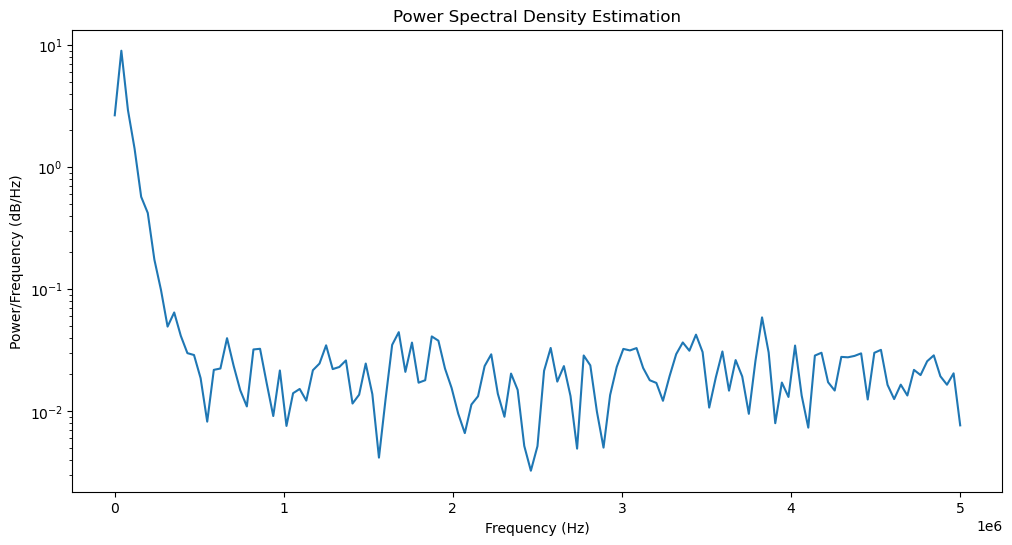

In [96]:
from scipy.signal import welch

f, Pxx = welch(df['Na'], fs=1/0.0000001, nperseg=256)
plt.figure(figsize=(12, 6))
plt.semilogy(f, Pxx)
plt.title('Power Spectral Density Estimation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()

### Continuous Wavelet Transform (CWT) Analysis Report
### Continuous Wavelet Transform (CWT) Analysis
#### Overview

Applied the Continuous Wavelet Transform (CWT) using the Complex Morlet wavelet.
Utilized scales ranging from 1 to 128 to analyze frequency content across different scales.

### CWT Matrix Representation

Plotted the absolute values of the CWT matrix, providing a time-scale representation of the sodium concentration signal.

#### Observations
#### CWT Matrix:
The color-coded representation depicts how the frequency content of the sodium concentration signal varies over time and scale.
Bright regions indicate significant energy at specific time and scale combinations.

#### Conclusion
The Continuous Wavelet Transform analysis provides a time-scale representation of the sodium concentration signal. Bright regions in the CWT matrix highlight dominant frequency components at different scales over time. This analysis helps identify patterns, oscillations, or changes in the signal that may not be evident in the time or frequency domain alone.

/home/pawan/anaconda3/lib/python3.10/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


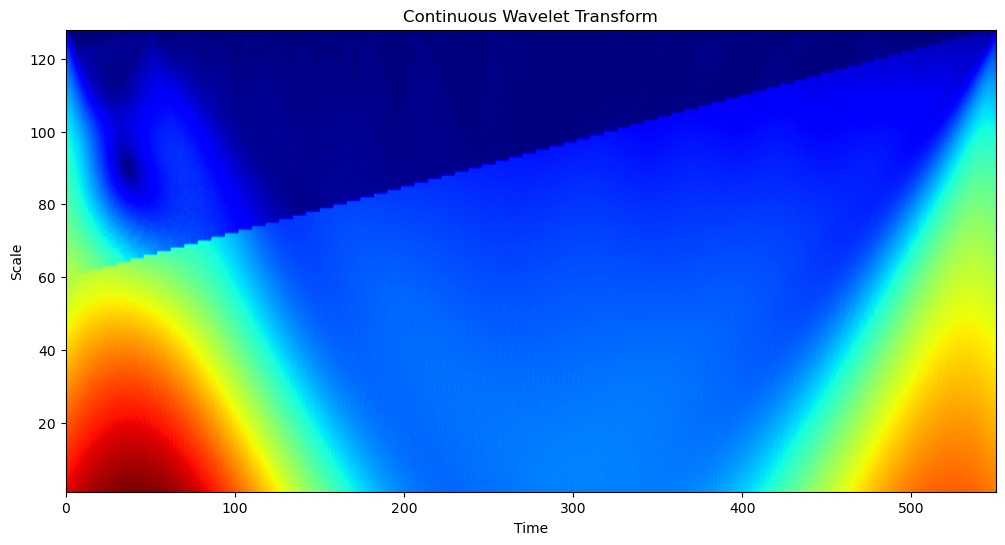

In [97]:
import pywt

cwtmatr, freqs = pywt.cwt(df['Na'], scales=np.arange(1, 128), wavelet='cmor')
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(cwtmatr), extent=[0, len(df['Na']), 1, 128], aspect='auto', cmap='jet')
plt.title('Continuous Wavelet Transform')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()

In [100]:
from nolds import lyap_e

# Example for Lyapunov exponent estimation
lyap_exp = lyap_e(df['Na'])
print(f"Lyapunov Exponent: {lyap_exp}")

Lyapunov Exponent: [ 0.0494306  -0.02360241 -0.08322839 -0.23254128]


In [101]:
from scipy.stats import entropy

shannon_entropy = entropy(df['Na'])
print(f"Shannon Entropy: {shannon_entropy}")

Shannon Entropy: 6.305726882831861


### Anomaly Detection using Z-Scores
### Step 1: Calculate Z-Scores
Z-scores are calculated for each data point in the 'Na' column using the formula: Z=X−meanstdZ=stdX−mean​
Where XX is the data point, meanmean is the mean of the 'Na' column, and stdstd is the standard deviation of the 'Na' column.
### Step 2: Set Threshold
A threshold of 2 is defined to determine what is considered an anomaly. Any data point with a z-score greater than 2 or less than -2 will be considered an anomaly.

### Step 3: Identify Anomalies
Data points with absolute z-scores exceeding the threshold are identified as anomalies. These points are stored in the 'anomalies' DataFrame.

### Step 4: Visualize the Time Series with Anomalies
The time series plot of sodium concentration is created using the 'Time' and 'Na' columns.
Anomalies are highlighted in red on the plot using 'x' markers.

### Observations
Anomalies are points that deviate significantly from the mean of the sodium concentration data.
The threshold of 2 is used to identify points that are 2 standard deviations away from the mean.

### Conclusion
Anomaly detection based on z-scores provides a simple and effective method to identify unusual behavior in the sodium concentration time series.
Detected anomalies can be further investigated to understand the potential causes of deviations from the expected patterns.

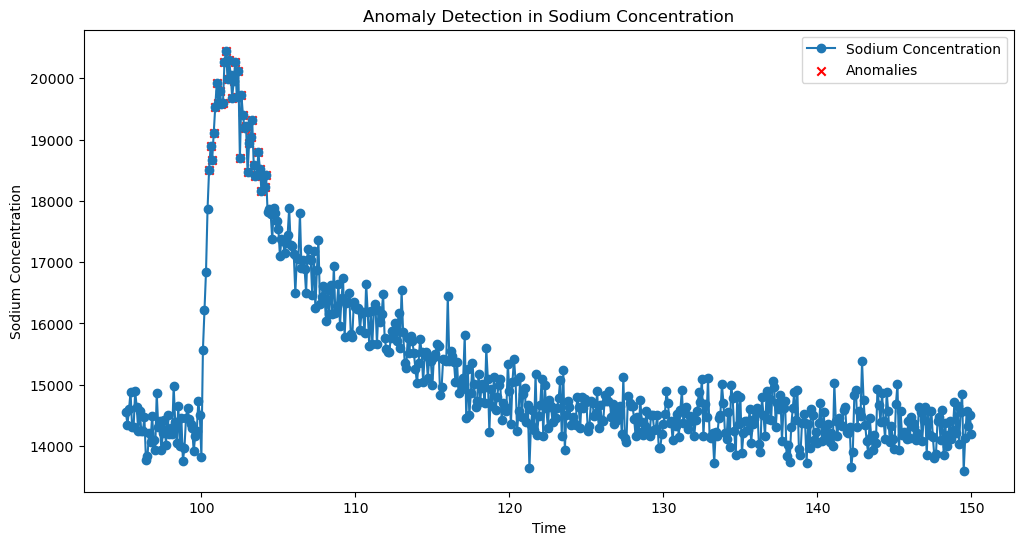

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Calculate z-scores for the 'Na' column
z_scores = (df['Na'] - df['Na'].mean()) / df['Na'].std()

# Set a threshold for anomaly detection
threshold = 2  # Adjust as needed

# Identify anomalies based on z-scores
anomalies = df.loc[np.abs(z_scores) > threshold]

# Visualize the time series with detected anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Na'], label='Sodium Concentration', marker='o', linestyle='-')
plt.scatter(anomalies['Time'], anomalies['Na'], color='red', label='Anomalies', marker='x')
plt.title('Anomaly Detection in Sodium Concentration')
plt.xlabel('Time')
plt.ylabel('Sodium Concentration')
plt.legend()
plt.show()